## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

## Dataset Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/geeksforgeeks-articles/articles.csv')
df.head(10)

,title,author_id,last_updated,link,category
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy
5,Kelvin To Celsius Formula,ramneek2307,"16 Feb, 2022",https://www.geeksforgeeks.org/kelvin-to-celsiu...,easy
6,How to Install MongoDB for VSCode?,ramneek2307,"12 Feb, 2022",https://www.geeksforgeeks.org/how-to-install-m...,easy
7,7 Highest Paying Programming Languages For Fre...,vanshika4042,"18 Feb, 2022",https://www.geeksforgeeks.org/7-highest-paying...,easy
8,Free Resume Builder By GeeksforGeeks – Create ...,GeeksforGeeks,"08 Feb, 2022",https://www.geeksforgeeks.org/free-resume-buil...,easy
9,8 Best Tips to Improve Your JavaScript Skills,prateekjangid10,"06 Feb, 2022",https://www.geeksforgeeks.org/8-best-tips-to-i...,easy


In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().sum()

title            0
author_id       19
last_updated    18
link             0
category         0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

title           0
author_id       0
last_updated    0
link            0
category        0
dtype: int64

## 1) Authors in the dataset

In [6]:
df['author_id'].describe()

count             34551
unique             5589
top       GeeksforGeeks
freq              11957
Name: author_id, dtype: object

There are 5589 authors, 34551 articles in the dataset and GeeksforGeeks having the most number of articles.

## 2) Most popular author(in terms of number of articles)

In [7]:
df[df['category']=='basic'].groupby('author_id').size().sort_values(ascending=False).head()

author_id
GeeksforGeeks          2296
ManasChhabra2           293
Shubrodeep Banerjee     112
Chinmoy Lenka            99
manjeet_04               91
dtype: int64

In [8]:
df[df['category']=='easy'].groupby('author_id').size().sort_values(ascending=False).head()

author_id
GeeksforGeeks     3825
sarthak_ishu11      77
manjeet_04          73
Striver             72
Chinmoy Lenka       55
dtype: int64

In [9]:
df[df['category']=='medium'].groupby('author_id').size().sort_values(ascending=False).head()

author_id
GeeksforGeeks    3981
Striver            91
pawan_asipu        53
manjeet_04         49
anuupadhyay        49
dtype: int64

In [10]:
df[df['category']=='hard'].groupby('author_id').size().sort_values(ascending=False).head()

author_id
GeeksforGeeks        1570
pawan_asipu            27
Striver                26
DivyanshuShekhar1      25
priyavermaa1198        21
dtype: int64

In [11]:
df[df['category']=='expert'].groupby('author_id').size().sort_values(ascending=False).head()

author_id
GeeksforGeeks      285
mishrapriyank17     36
pintusaini          34
harkiran78          24
zack_aayush         22
dtype: int64

GeeksforGeeks is the most popular author in all the categories.

## 3) Most number of articles( based on category)

In [12]:
df.groupby('category').size()

category
basic      8140
easy       9654
expert     2094
hard       4232
medium    10431
dtype: int64

<AxesSubplot:xlabel='category'>

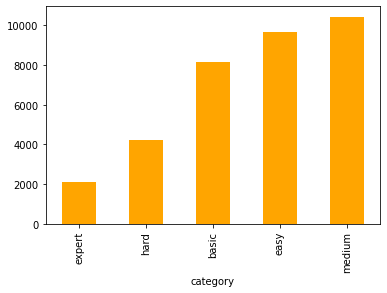

In [13]:
df.groupby('category').size().sort_values(ascending = True).plot(kind = 'bar',color='orange')

Medium category is having the most number of articles published and expert is having the least.

## 4) Percentage of articles are in expert category out of total number of articles.

In [14]:
total_articles=len(df)
expert_articles=len(df[df['category']=='expert'])
percent=round((expert_articles/total_articles)*100,0)
print(percent)

6.0


Out of total number of articles 6% are expert category articles.

## 5) Day-wise Analysis

In [15]:
df = df[df['last_updated'] != 'Easy']
df = df[df['last_updated'] != 'Basic']
df = df[df['last_updated'] != 'Medium']
df = df[df['last_updated'] != 'Hard']
df = df[df['last_updated'] != 'Expert']

data = df.values


day   = []
month = []
year  = []

for i in range(len(data)):
    day.append(int(data[i][2].split(' ')[0]))
    month.append(data[i][2].split(' ')[1][:-1])
    year.append(int(data[i][2].split(' ')[2]))
    
df['day'] = day
df['month'] = month
df['year'] = year

In [16]:
df.head()

,title,author_id,last_updated,link,category,day,month,year
0,5 Best Practices For Writing SQL Joins,priyankab14,"21 Feb, 2022",https://www.geeksforgeeks.org/5-best-practices...,easy,21,Feb,2022
1,Foundation CSS Dropdown Menu,ishankhandelwals,"20 Feb, 2022",https://www.geeksforgeeks.org/foundation-css-d...,easy,20,Feb,2022
2,Top 20 Excel Shortcuts That You Need To Know,priyankab14,"17 Feb, 2022",https://www.geeksforgeeks.org/top-20-excel-sho...,easy,17,Feb,2022
3,Servlet – Fetching Result,nishatiwari1719,"17 Feb, 2022",https://www.geeksforgeeks.org/servlet-fetching...,easy,17,Feb,2022
4,Suffix Sum Array,rohit768,"21 Feb, 2022",https://www.geeksforgeeks.org/suffix-sum-array/,easy,21,Feb,2022


<AxesSubplot:xlabel='day'>

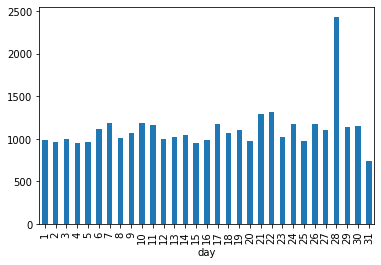

In [17]:
df.groupby('day').size().plot(kind = 'bar')

The maximum number of articles are published on 28th day of a month rather than any other day.

## 6) Month-wise Analysis

<AxesSubplot:xlabel='month'>

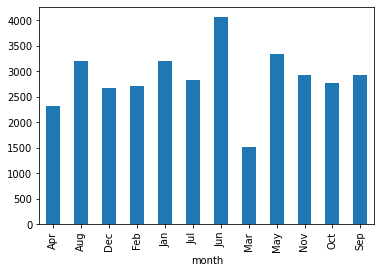

In [18]:
df.groupby('month').size().plot(kind = 'bar')

The month of March has least number of articles published and articles published are at peak in June.

## 7) Year-wise Analysis

<AxesSubplot:xlabel='year'>

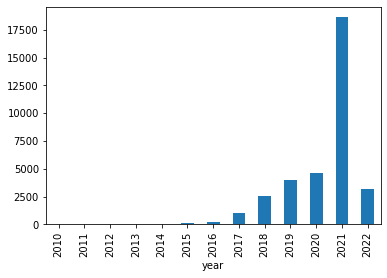

In [19]:
df.groupby('year').size().plot(kind = 'bar')

Thers is an upward trend in the number of articles published and it is expected to see a similar trend in the ongoing year 2022.

## 8) Growth Rate of articles written 2021 as compare to 2020

In [20]:
df.groupby('year').size().sort_values(ascending=False)

year
2021    18613
2020     4625
2019     3985
2022     3187
2018     2522
2017     1021
2016      200
2015      172
2013       70
2014       53
2012        5
2010        1
2011        1
dtype: int64

In [21]:
growth_rate=int((18613-4625)/4625*100)
print(growth_rate)

302


Growth rate is found to be 302 % compared to the year 2020.

## 9) Finding articles based on tags(like Data Science)

In [22]:
tag = 'data Science'.lower()
findings=[]
for i in range(len(data)):
    if tag in data[i][0].lower():
        findings.append(data[i][0])
        print(data[i][0], data[i][3])

print (len(findings))

Top 10 Data Science Blogs for 2021 https://www.geeksforgeeks.org/top-10-data-science-blogs-for-2021/
How is Data Science Changing the Healthcare Industry? https://www.geeksforgeeks.org/how-is-data-science-changing-the-healthcare-industry/
What’s Data Science Pipeline? https://www.geeksforgeeks.org/whats-data-science-pipeline/
4 Key Pillars of Data Science https://www.geeksforgeeks.org/4-key-pillars-of-data-science/
ZS Associates Interview Experience for Data Science Associate https://www.geeksforgeeks.org/zs-associates-interview-experience-for-data-science-associate/
Top 8 Data Science Competitions To Consider in 2021 https://www.geeksforgeeks.org/8-most-popular-data-science-competitions/
Commonly used file formats in Data Science https://www.geeksforgeeks.org/commonly-used-file-formats-in-data-science/
Machine Learning and Data Science https://www.geeksforgeeks.org/machine-learning-and-data-science/
Introduction to Data Science https://www.geeksforgeeks.org/introduction-to-data-scienc

There are a total of 35 articles based on Data Science.